# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

optimizers = []
for lr in LEARNING_RATE:
    opt= keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    optimizers.append([opt, lr])
    opt = keras.optimizers.RMSprop(lr=lr)
    optimizers.append([opt, lr])
    opt = keras.optimizers.Adam(lr=lr)
    optimizers.append([opt, lr])
    opt = keras.optimizers.Adagrad(lr=lr)
    optimizers.append([opt, lr])
    
num_opts = len(optimizers)
print(num_opts)

20


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for [optimizer, lr] in optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, optimizer = %s" % (lr, str(optimizer))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(optimizer))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
print(len(results))

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 11s 219us/step - loss: 1.4460 - accuracy: 0.4954 - val_loss: 1.5993 - val_accuracy: 0.4470
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.4297 - accuracy: 0.5008 - val_loss: 1.6730 - val_accuracy: 0.4298
Epoch 50/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.4322 - accuracy: 0.5006 - val_loss: 1.6948 - val_accuracy: 0.4201
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 245us/step - loss: 2.3080 - accuracy: 0.1002 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.3080 - accuracy: 0.1024 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3152 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.3079 - accuracy: 0.1008 - val_loss: 2.3202 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.3083 - accuracy: 0.0987 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.3075 - accuracy: 0.1020 - val_loss: 2.3081 - val_accuracy: 0.1000
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 14s 274us/step - loss: 2.3075 - accuracy: 0.0999 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.3072 - accuracy: 0.1004 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.3068 - accuracy: 0.1000 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.3073 - accuracy: 0.0977 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.3072 - accuracy: 0.1002 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3063 - accuracy: 0.1010 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 14s 270us/step - loss: 2.3071 - accuracy: 0.1008 - va

50000/50000 [==============================] - 11s 211us/step - loss: 1.7720 - accuracy: 0.3276 - val_loss: 1.8530 - val_accuracy: 0.2773
Epoch 40/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.7669 - accuracy: 0.3334 - val_loss: 1.7800 - val_accuracy: 0.3421
Epoch 41/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7576 - accuracy: 0.3384 - val_loss: 1.7917 - val_accuracy: 0.3263
Epoch 42/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7488 - accuracy: 0.3468 - val_loss: 1.7518 - val_accuracy: 0.3437
Epoch 43/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.7434 - accuracy: 0.3506 - val_loss: 1.8222 - val_accuracy: 0.3310
Epoch 44/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.7317 - accuracy: 0.3563 - val_loss: 1.7205 - val_accuracy: 0.3660
Epoch 45/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.7346 - accuracy: 0.3597 - va

50000/50000 [==============================] - 11s 230us/step - loss: 0.6144 - accuracy: 0.7804 - val_loss: 1.7777 - val_accuracy: 0.5084
Epoch 37/50
50000/50000 [==============================] - 12s 232us/step - loss: 0.5890 - accuracy: 0.7892 - val_loss: 1.7796 - val_accuracy: 0.5162
Epoch 38/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.5736 - accuracy: 0.7943 - val_loss: 1.7939 - val_accuracy: 0.5158
Epoch 39/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.5545 - accuracy: 0.8008 - val_loss: 1.8079 - val_accuracy: 0.5301
Epoch 40/50
50000/50000 [==============================] - 12s 232us/step - loss: 0.5380 - accuracy: 0.8073 - val_loss: 1.9646 - val_accuracy: 0.5142
Epoch 41/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.5253 - accuracy: 0.8110 - val_loss: 1.8541 - val_accuracy: 0.5341
Epoch 42/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.5031 - accuracy: 0.8184 - va

50000/50000 [==============================] - 12s 243us/step - loss: 1.9070 - accuracy: 0.2903 - val_loss: 1.8840 - val_accuracy: 0.2943
Epoch 34/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.9107 - accuracy: 0.2905 - val_loss: 1.8936 - val_accuracy: 0.2973
Epoch 35/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.9113 - accuracy: 0.2873 - val_loss: 2.0891 - val_accuracy: 0.2395
Epoch 36/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.9063 - accuracy: 0.2897 - val_loss: 1.9789 - val_accuracy: 0.2765
Epoch 37/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8938 - accuracy: 0.2940 - val_loss: 1.9143 - val_accuracy: 0.2769
Epoch 38/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.8984 - accuracy: 0.2955 - val_loss: 1.8823 - val_accuracy: 0.2961
Epoch 39/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.8945 - accuracy: 0.2949 - va

50000/50000 [==============================] - 13s 257us/step - loss: 1.5922 - accuracy: 0.4290 - val_loss: 1.6681 - val_accuracy: 0.4066
Epoch 31/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.5826 - accuracy: 0.4298 - val_loss: 1.6243 - val_accuracy: 0.4208
Epoch 32/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5796 - accuracy: 0.4342 - val_loss: 1.6525 - val_accuracy: 0.4056
Epoch 33/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5926 - accuracy: 0.4276 - val_loss: 1.6645 - val_accuracy: 0.4049
Epoch 34/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5942 - accuracy: 0.4260 - val_loss: 1.6793 - val_accuracy: 0.4073
Epoch 35/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.5764 - accuracy: 0.4345 - val_loss: 1.6258 - val_accuracy: 0.4228
Epoch 36/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.5746 - accuracy: 0.4347 - va

50000/50000 [==============================] - 12s 233us/step - loss: 1.2694 - accuracy: 0.5537 - val_loss: 1.5095 - val_accuracy: 0.4793
Epoch 28/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.2606 - accuracy: 0.5565 - val_loss: 1.4015 - val_accuracy: 0.5047
Epoch 29/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.2555 - accuracy: 0.5568 - val_loss: 1.4241 - val_accuracy: 0.4990
Epoch 30/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2444 - accuracy: 0.5619 - val_loss: 1.4244 - val_accuracy: 0.4928
Epoch 31/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.2362 - accuracy: 0.5650 - val_loss: 1.4082 - val_accuracy: 0.5079
Epoch 32/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2297 - accuracy: 0.5680 - val_loss: 1.3714 - val_accuracy: 0.5185
Epoch 33/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.2197 - accuracy: 0.5716 - va

50000/50000 [==============================] - 13s 254us/step - loss: 1.1956 - accuracy: 0.5795 - val_loss: 1.3713 - val_accuracy: 0.5174
Epoch 25/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1806 - accuracy: 0.5852 - val_loss: 1.3751 - val_accuracy: 0.5032
Epoch 26/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1680 - accuracy: 0.5901 - val_loss: 1.3423 - val_accuracy: 0.5251
Epoch 27/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.1518 - accuracy: 0.5936 - val_loss: 1.4273 - val_accuracy: 0.5009
Epoch 28/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.1407 - accuracy: 0.6016 - val_loss: 1.3807 - val_accuracy: 0.5092
Epoch 29/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1267 - accuracy: 0.6048 - val_loss: 1.4036 - val_accuracy: 0.5077
Epoch 30/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1112 - accuracy: 0.6113 - va

50000/50000 [==============================] - 12s 244us/step - loss: 1.2094 - accuracy: 0.5698 - val_loss: 1.5415 - val_accuracy: 0.4681
Epoch 22/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1932 - accuracy: 0.5747 - val_loss: 1.5172 - val_accuracy: 0.4907
Epoch 23/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1682 - accuracy: 0.5835 - val_loss: 1.4859 - val_accuracy: 0.4855
Epoch 24/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.1531 - accuracy: 0.5921 - val_loss: 1.6167 - val_accuracy: 0.4644
Epoch 25/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.1274 - accuracy: 0.5986 - val_loss: 1.5769 - val_accuracy: 0.4849
Epoch 26/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.1135 - accuracy: 0.6025 - val_loss: 1.5591 - val_accuracy: 0.4713
Epoch 27/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.0937 - accuracy: 0.6113 - va

50000/50000 [==============================] - 14s 281us/step - loss: 1.1606 - accuracy: 0.5844 - val_loss: 1.3476 - val_accuracy: 0.5216
Epoch 19/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.1336 - accuracy: 0.5953 - val_loss: 1.3321 - val_accuracy: 0.5295
Epoch 20/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.1193 - accuracy: 0.5997 - val_loss: 1.3529 - val_accuracy: 0.5264
Epoch 21/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.0981 - accuracy: 0.6093 - val_loss: 1.4231 - val_accuracy: 0.5063
Epoch 22/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.0810 - accuracy: 0.6146 - val_loss: 1.3440 - val_accuracy: 0.5328
Epoch 23/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.0602 - accuracy: 0.6230 - val_loss: 1.3632 - val_accuracy: 0.5268
Epoch 24/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.0463 - accuracy: 0.6272 - va

50000/50000 [==============================] - 12s 236us/step - loss: 1.4708 - accuracy: 0.4860 - val_loss: 1.5045 - val_accuracy: 0.4728
Epoch 16/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.4598 - accuracy: 0.4901 - val_loss: 1.4932 - val_accuracy: 0.4769
Epoch 17/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4495 - accuracy: 0.4949 - val_loss: 1.4945 - val_accuracy: 0.4765
Epoch 18/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.4387 - accuracy: 0.4964 - val_loss: 1.4949 - val_accuracy: 0.4708
Epoch 19/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.4311 - accuracy: 0.5014 - val_loss: 1.4800 - val_accuracy: 0.4826
Epoch 20/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.4215 - accuracy: 0.5045 - val_loss: 1.4875 - val_accuracy: 0.4716
Epoch 21/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4139 - accuracy: 0.5082 - va

50000/50000 [==============================] - 11s 223us/step - loss: 1.7991 - accuracy: 0.3762 - val_loss: 1.7953 - val_accuracy: 0.3714
Epoch 13/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7869 - accuracy: 0.3804 - val_loss: 1.7839 - val_accuracy: 0.3754
Epoch 14/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7758 - accuracy: 0.3833 - val_loss: 1.7722 - val_accuracy: 0.3797
Epoch 15/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7643 - accuracy: 0.3860 - val_loss: 1.7629 - val_accuracy: 0.3818
Epoch 16/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.7540 - accuracy: 0.3904 - val_loss: 1.7536 - val_accuracy: 0.3865
Epoch 17/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7443 - accuracy: 0.3938 - val_loss: 1.7434 - val_accuracy: 0.3891
Epoch 18/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7348 - accuracy: 0.3966 - va

50000/50000 [==============================] - 12s 244us/step - loss: 1.4895 - accuracy: 0.4754 - val_loss: 1.5282 - val_accuracy: 0.4599
Epoch 10/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.4639 - accuracy: 0.4813 - val_loss: 1.5674 - val_accuracy: 0.4361
Epoch 11/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.4416 - accuracy: 0.4915 - val_loss: 1.5387 - val_accuracy: 0.4483
Epoch 12/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.4218 - accuracy: 0.4992 - val_loss: 1.5505 - val_accuracy: 0.4493
Epoch 13/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.3981 - accuracy: 0.5076 - val_loss: 1.5004 - val_accuracy: 0.4629
Epoch 14/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.3843 - accuracy: 0.5130 - val_loss: 1.5946 - val_accuracy: 0.4333
Epoch 15/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.3629 - accuracy: 0.5199 - va

50000/50000 [==============================] - 14s 276us/step - loss: 1.4898 - accuracy: 0.4741 - val_loss: 1.5018 - val_accuracy: 0.4639
Epoch 7/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.4631 - accuracy: 0.4833 - val_loss: 1.4687 - val_accuracy: 0.4839
Epoch 8/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.4253 - accuracy: 0.4982 - val_loss: 1.4636 - val_accuracy: 0.4764
Epoch 9/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.4047 - accuracy: 0.5047 - val_loss: 1.4379 - val_accuracy: 0.4863
Epoch 10/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.3846 - accuracy: 0.5111 - val_loss: 1.4452 - val_accuracy: 0.4811
Epoch 11/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.3610 - accuracy: 0.5202 - val_loss: 1.4278 - val_accuracy: 0.4908
Epoch 12/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.3335 - accuracy: 0.5304 - val_l

50000/50000 [==============================] - 12s 231us/step - loss: 1.8974 - accuracy: 0.3433 - val_loss: 1.8864 - val_accuracy: 0.3447
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.8707 - accuracy: 0.3555 - val_loss: 1.8651 - val_accuracy: 0.3507
Epoch 5/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.8513 - accuracy: 0.3618 - val_loss: 1.8483 - val_accuracy: 0.3590
Epoch 6/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.8355 - accuracy: 0.3671 - val_loss: 1.8349 - val_accuracy: 0.3624
Epoch 7/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.8221 - accuracy: 0.3735 - val_loss: 1.8238 - val_accuracy: 0.3663
Epoch 8/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.8105 - accuracy: 0.3770 - val_loss: 1.8131 - val_accuracy: 0.3717
Epoch 9/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.8006 - accuracy: 0.3803 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3271 - accuracy: 0.1276 - val_loss: 2.2914 - val_accuracy: 0.1455
Epoch 2/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.2761 - accuracy: 0.1553 - val_loss: 2.2639 - val_accuracy: 0.1654
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.2540 - accuracy: 0.1678 - val_loss: 2.2447 - val_accuracy: 0.1756
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.2359 - accuracy: 0.1831 - val_loss: 2.2277 - val_accuracy: 0.1901
Epoch 5/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.2194 - accuracy: 0.1941 - val_loss: 2.2121 - val_accuracy: 0.2011
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.2042 - accuracy: 0.2064 - val_loss: 2.1975 - val_accuracy: 0.2117
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.1089 - accuracy: 0.2461 - val_loss: 1.9992 - val_accuracy: 0.2948
Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.9449 - accuracy: 0.3193 - val_loss: 1.9104 - val_accuracy: 0.3202
Epoch 3/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.8720 - accuracy: 0.3467 - val_loss: 1.8581 - val_accuracy: 0.3462
Epoch 4/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.8262 - accuracy: 0.3625 - val_loss: 1.8140 - val_accuracy: 0.3592
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7915 - accuracy: 0.3739 - val_loss: 1.7831 - val_accuracy: 0.3761
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7646 - accuracy: 0.3852 - val_loss: 1.7571 - val_accuracy: 0.3853
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.1499 - accuracy: 0.2294 - val_loss: 2.0249 - val_accuracy: 0.2997
Epoch 2/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.9605 - accuracy: 0.3163 - val_loss: 1.9109 - val_accuracy: 0.3364
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8762 - accuracy: 0.3469 - val_loss: 1.8490 - val_accuracy: 0.3538
Epoch 4/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.8238 - accuracy: 0.3642 - val_loss: 1.8053 - val_accuracy: 0.3777
Epoch 5/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7861 - accuracy: 0.3776 - val_loss: 1.7716 - val_accuracy: 0.3885
Epoch 6/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.7552 - accuracy: 0.3901 - val_loss: 1.7460 - val_accuracy: 0.3917
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2757 - accuracy: 0.1481 - val_loss: 2.2417 - val_accuracy: 0.1876
Epoch 2/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.2250 - accuracy: 0.1956 - val_loss: 2.2107 - val_accuracy: 0.1999
Epoch 3/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.1998 - accuracy: 0.2080 - val_loss: 2.1904 - val_accuracy: 0.2094
Epoch 4/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1819 - accuracy: 0.2178 - val_loss: 2.1748 - val_accuracy: 0.2202
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.1674 - accuracy: 0.2250 - val_loss: 2.1617 - val_accuracy: 0.2260
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1550 - accuracy: 0.2315 - val_loss: 2.1504 - val_accuracy: 0.2327
Epoch 7/50
50000/50000 [==============================] - 9

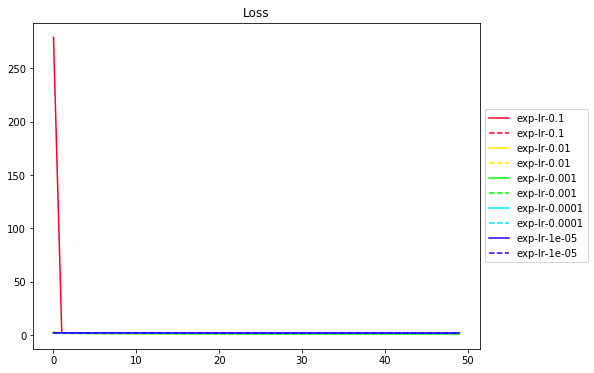

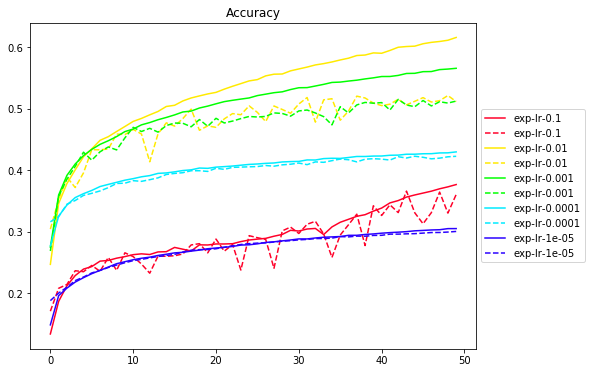

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()